# <u>  Palmer Penguins </u>

![](penguins.jpg)

## Introduction:

The Palmer Penguins data set was collected by Dr. Kristen Gorman and the Palmer Station, Anartica LTER, a member of the Long Term Ecological Research Network. It contains physiological measurements from three species of penguins and is widely used in data analysis. My goal with homework 1 is to identify three characteristics (two quantitative and one qualitative) and a model, which I then train, to identify penguin species with 100% testing accuracy. 

In [3]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

In [4]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


## 1. Explore: 

To start my exploration into the penguin data, I first sough to understand the data by plotting it

/Users/lindseyschweitzer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lindseyschweitzer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


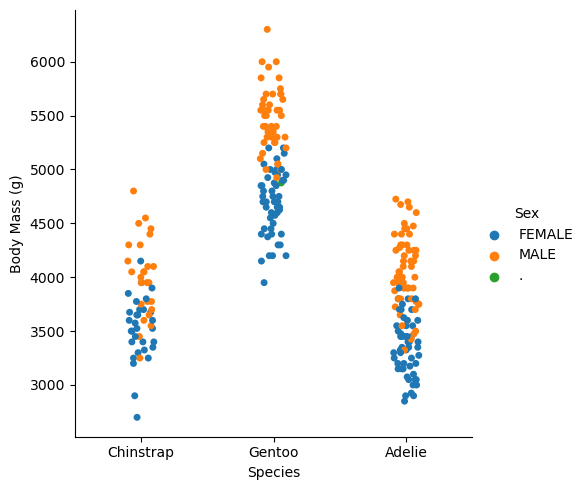

In [5]:
import seaborn as sns

# body mass vs specie with colors for gender

# replace the column with the first word in each entry
train["Species"] = train["Species"].str.split().str.get(0)

sns.catplot(data=train, x="Species", y="Body Mass (g)", hue="Sex")

This plot shows penguins as points colored by sex, with species as the x-axis and body mass (in grams) on the y-axis. This plot displays that on average, male penguins are larger than female penguins. It also shows a trend of Gentoo species of penguins larger than Chinstrap or Adelie penguins- who are relatively similar in size. This indicates that Body Mass (g) could potentially be a useful indicator in indicating species type. It is also important to note that the separation of gender allows us to make these assertions. Gento male penguins are generally larger than Adelie male penguins and the same follows with female penguins of these same two species. However, Gentoo female penguins are roughly the same size as Adelie male penguins. Therefore gender might be a useful tool in predicting penguin species.

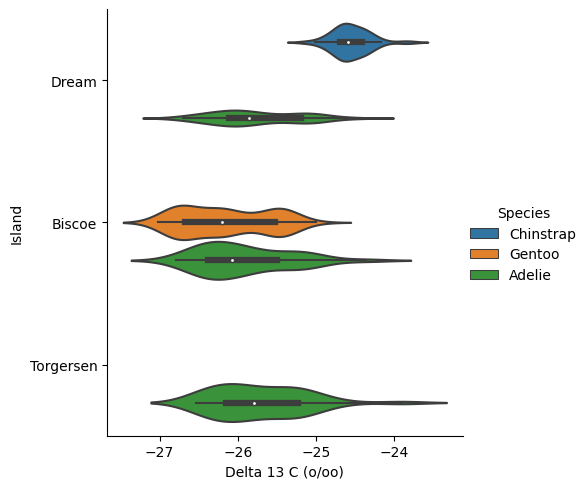

In [6]:
sns.catplot(data=train, kind="violin", x="Delta 13 C (o/oo)", y="Island", hue="Species")

This plot shows the penguins of different species with different colors graphed on Delta 13 C (o/oo) and Island location. Delta 13(o/oo) is an interesting indicator as it is widely used as an indicator of diet especially in reference to vegetation. This therefore shows that there could be a large difference in diet between Chinstrap and the other two species of penguins. Adelie penguins are present in all three islands whereas Gentoo and Chinstrap penguins are isolated to one of the three. Therefore Island could be a helpful indicator of species type, but probably would not be indicative by itself.

In [7]:
table = train.groupby(['Species', 'Sex']).aggregate({'Culmen Length (mm)' : ['min', 'max','mean']})
print(table)

                 Culmen Length (mm)                 
                                min   max       mean
Species   Sex                                       
Adelie    FEMALE               34.0  42.2  37.426415
          MALE                 34.6  46.0  40.404918
Chinstrap FEMALE               40.9  58.0  46.722581
          MALE                 49.0  55.8  51.334615
Gentoo    .                    44.5  44.5  44.500000
          FEMALE               40.9  50.5  45.455102
          MALE                 44.4  55.9  49.006818


This table indicates that on average male penguins have longer Culmen Length than their female counterparts. Male Gentoo penguins have longer Culmens then male Chinstraps who have longer Culmens than male Adelie penguins while the order for female penguins descends for Chinstrap, Gentoo, then Adelie. These distinctions could serve useful in training our model to differentiate species. It also serves to note that the gender distinction matters when comparing species. 

## 2. Model

I then attempted to find three features of the data (one qualitative and two quantitative) and train a model on these features that achieves 100% testing accuracy.

First I did data preparation to prepare the quantitative columns of the data

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

In [9]:
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True


I completed an exhaustive iterative search to find the best markers. I used cross validation one each combination of one qualitative and two quantitative column with different models keeping track of the best score for each model. In terms of models I used a Logistic Regression, Decision Tree Classifier, SVC, and Random Forrest Classifier. For the Decision Tree Classifier and the Random Forrest Classifier I used grid search across the amount of parameters to identify the optimal maximum depth. For SVC I used grid search to find the optimal value for gamma across a wide array of numbers. With the best markers of each model, I also saved the columns of the best score. 

In [10]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

all_qual_cols = ["Clutch Completion", "Sex", "Island",'Stage_Adult, 1 Egg Stage']
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)',]

bestLRScore = 0.0
bestLRCols=[]
col_combos = []


bestDTCScore = 0.0
bestDTCCols=[]

bestSVMScore = 0.0
bestSVMCols=[]

bestRFCScore = 0.0
bestRFCCols=[]

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 

    #LogisticRegression
    LR = LogisticRegression(max_iter=10000000000000000000)
        
    LRScore = cross_val_score(LR, X_train[cols], y_train, cv=5).mean()
    
    # keep track of best Logistic Regression Score
    if LRScore >= bestLRScore :
      bestLRScore = LRScore
      bestLRCols = cols
        
    #DecisionTreeClassifier
    param_grid = { 'max_depth': [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None ]}
    
    tree = DecisionTreeClassifier()
    grid_search = GridSearchCV(tree, param_grid, cv=5)
    grid_search.fit(X_train[cols], y_train)
    DTCScore  = grid_search.best_score_
        
    if(DTCScore > bestDTCScore):
      bestDTCScore = DTCScore
      bestDTCCols = cols
      bestDTCDepth = grid_search.best_params_
      
    
    # Random Forrest Classifier    
    forrest = RandomForestClassifier(random_state=0)
    grid_search = GridSearchCV(forrest, param_grid, cv=5)
    grid_search.fit(X_train[cols], y_train)
    
    RFCScore  = grid_search.best_score_
    
    # keep track of best RFC Score  
    if(RFCScore > bestRFCScore):
      bestRFCScore = RFCScore
      bestRFCCols = cols
      bestRFCDepth = grid_search.best_params_
    
    #SVC
    SVM = SVC()

    # use grid search to find best gamma for SVM
    g = {'gamma': 10.0 ** np.arange(-5, 5) }

    grid_search = GridSearchCV(SVM, g, cv=5)
    grid_search.fit(X_train[cols], y_train)
    
    SVMScore  = grid_search.best_score_   
    
    # keep track of best SVM Score
    if(SVMScore > bestSVMScore):
      bestSVMScore = SVMScore
      bestSVMCols = cols
        

  
print("best LR",bestLRCols, ":", bestLRScore)
print("best DTC",bestDTCCols, ":", bestDTCScore)
print("best max depth:", bestDTCDepth)
print("best RFC", bestRFCCols, ":", bestRFCScore)
print("best max depth:", bestRFCDepth)
print("best SVM", bestSVMCols, ":", bestSVMScore)

best LR ['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)'] : 0.9883107088989442
best DTC ['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)'] : 0.9765460030165913
best max depth: {'max_depth': 7}
best RFC ['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Flipper Length (mm)'] : 0.9844645550527904
best max depth: {'max_depth': 5}
best SVM ['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)'] : 0.9805429864253394


From my iterative search through the features and the different models I was able to find that the best score was Logistic Regression with Culmen Length (mm), Culmen Depth (mm), and Sex. This model with these features had a 0.9883107088989442% classification rate. This made sense as I noted in my data exploration that sex was an important distinction to make when comparing different features to classify teh species. 

## 3. Test the models on the test data.

Next I prepared the test data by shorting my Species column and identifying selected columns of the best fitting models- Culmen Length (mm), Culmen Depth (mm), and Sex for Logistic Regression. On my test data I achieved 100% testing accuracy.

In [11]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

test["Species"] = test["Species"].str.split().str.get(0)

X_test, y_test = prepare_data(test)

selected_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)','Sex_FEMALE', 'Sex_MALE']

X_train_selected = X_train[selected_cols]
X_test_selected = X_test[selected_cols]

LR = LogisticRegression()
LR.fit(X_train_selected, y_train)
testScore = LR.score(X_test_selected, y_test)

print(testScore)

1.0


/Users/lindseyschweitzer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 4. Plotting Decision Regions

I visualized how my model worked on the training and test data by plotting the data and displaying the decision regions of my model.

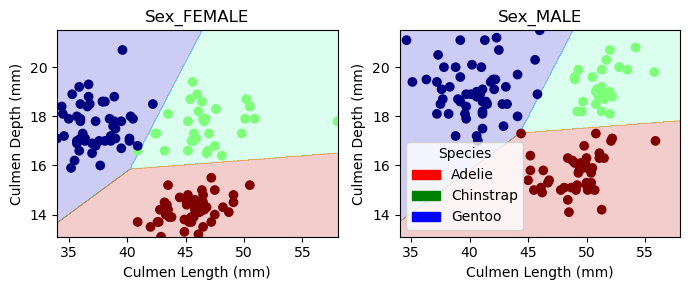

In [12]:
from matplotlib import pyplot as plt
import numpy as np

from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
        X.columns[0] : XX,
        X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

plot_regions(LR, X_train_selected, y_train)

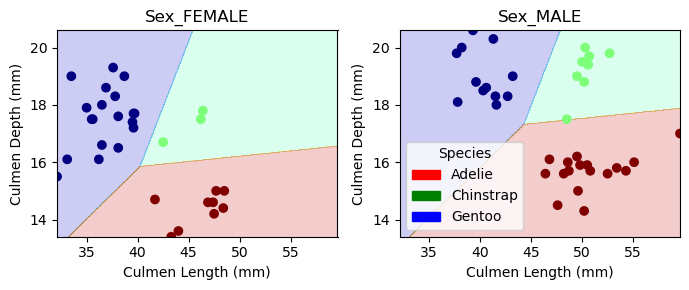

In [13]:
plot_regions(LR, X_test_selected, y_test)

## 5. Confusion Matrix

Finally, to visualize the successful identification of my model with my three chosen characteristics I used a confusion matrix on the testing data.

In [17]:
from sklearn.metrics import confusion_matrix

y_test_pred = LR.predict(X_test_selected)
C = confusion_matrix(y_test, y_test_pred)

for i in range(3):
    for j in range(3):
        print(f"There were {C[i,j]} {le.classes_[i]} penguin(s) who were classified as {le.classes_[j]}.")

There were 31 Adelie penguin(s) who were classified as Adelie.
There were 0 Adelie penguin(s) who were classified as Chinstrap.
There were 0 Adelie penguin(s) who were classified as Gentoo.
There were 0 Chinstrap penguin(s) who were classified as Adelie.
There were 11 Chinstrap penguin(s) who were classified as Chinstrap.
There were 0 Chinstrap penguin(s) who were classified as Gentoo.
There were 0 Gentoo penguin(s) who were classified as Adelie.
There were 0 Gentoo penguin(s) who were classified as Chinstrap.
There were 26 Gentoo penguin(s) who were classified as Gentoo.


In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred, normalize = "true")

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

This is a perfect confusion matrix as the model has 100% testing accuracy in classifying the penguins. This result is exactly what we want.

## Discussion

This blog post taught me many things. Firstly, it allowed me to gain practice exploring and understanding data. I was able to explore the Palmer Penguin data set by creating tables and graphs. Then I was able to use the knowledge gained by the exploration to train my own classifier. I was able to become familiar with various different machine learning models through this assignment: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and Support Vector Machines. Through this process, I learned about grid search and how to find optimal parameters. I then got practice training a Logistic Regression with Culmen Length (mm), Culmen Depth (mm), and Sex and finally testing it on our test data to get a 100% accuracy rate. Not only did I become more familiar with this particular data set, but I was able to learn skills in how to analyze data and build and test Machine Learning Models.